# Parameter Estimation with BILBY 

1. **Prior file**

    Default prior files for BBH (`binary_black_holes.prior`) and BNS (`binary_neutron_stars.prior`).
    
    Need to adapt prior file for different approximants (e.g. aligned-spin or non-spinning waveforms).
    
    Existing prior classes, run: `help(bilby.gw.prior)`
    
2. **Getting interferometer data**

    - duration: length of data segment containing the signal
    - roll_off:   smoothness of transition from no signal to max signal in a Tukey Window.
    - psd_offset, psd_duration:   PSD is estimated using data from 'center_time + psd_offset' to 'center_time + psd_offset + psd_duration'
    - filter_freq:   low pass filter frequency to cut signal content above Nyquist frequency. The condition is 2 * filter_freq >= sampling_frequency
    - sample_rate: most data are stored by LOSC at 4096 Hz, there may be event-related data releases with a 16384 Hz rate.
    - channels: source data stream for LOSC data.
    For some events a "tag" is required to download the data. (CLN = clean data)
    
3. **Changing waveform approximant**

     Overview of Approximants:
     https://www.lsc-group.phys.uwm.edu/ligovirgo/cbcnote/Waveforms/Overview
     
     Selecting approximant and reference frequency:
     ~~~~
     waveform_arguments = {'waveform_approximant': 'IMRPhenomPv2',
                      'reference_frequency': 50}
     ~~~~
     For aligned-spin waveform models, such as IMRPhenomD or TaylorF2:
     ~~~~
     a_1 = bilby.gw.prior.AlignedSpin(name="a_1)
     a_2 = bilby.gw.prior.AlignedSpin(name="a_2")
     tilt_1 = 0
     tilt_2 = 0
     ~~~~
     For IMRPhenomC need to modify range of spins prior (default is ```Uniform(0-1)```):
     ~~~~
     a_1 = bilby.gw.prior.AlignedSpin(name="a_1", a_prior=Uniform(0, 0.9), z_prior=Uniform(-0.9, 0.9))
     a_2 = bilby.gw.prior.AlignedSpin(name="a_2", a_prior=Uniform(0, 0.9), z_prior=Uniform(-0.9, 0.9))
     ~~~~
    
4. **Changing sampler**
  
     Documentation on implemented samplers: https://lscsoft.docs.ligo.org/bilby/samplers.html
     
     List of available off-the-shelf samplers, run: `bilby.sampler.implemented_samplers`
     
5. **Marginalising over time, distance, phase**  

     - Time marginalisation uses FFT and can use a prior file.
     - Distance marginalisation uses a look up table calculated at run time.
     - Phase marginalisation is done analytically using a Bessel function.

     Currenlty not working?
6. **Comparing to LALInference results**

     Installing ipykernel for bilby (https://anbasile.github.io/programming/2017/06/25/jupyter-venv/):
     
     Install bilby in a virtual environment called "bilby":
     ~~~~
     source bilby/bin/activate
     pip install ipykernel
     ipython kernel install --user --name=bilby
     ~~~~
     Install latest version of LALSuite (https://wiki.ligo.org/Computing/DASWG/LALSuite):
     ~~~~
     pip install --pre lalsuite
     ~~~~

In [1]:
import bilby
import numpy as np
import matplotlib.pyplot as plt
import deepdish

10:02 bilby INFO    : Running bilby version: 0.3.5:


# IMRPHENOMPV2

**For BILBY v 0.3.1**

Posterior samples are saved are .txt files using:

  ```result = bilby.result.read_in_result(filename='outdir/GW150914_result.h5')```
  
  ```result.save_posterior_samples()```

9th column: mass 2

10th column: mass 1

In [29]:
bilby_Pv2_old = np.loadtxt('/home/c1819547/bilby_practice/GW150914_IMRPhenomPv2/outdir/GW150914_posterior_samples.txt', skiprows = 1, delimiter =',')

In [30]:
bilby_Pv2_034_newPrior = bilby.result.read_in_result(filename= '/home/c1819547/bilby_practice/GW150914_IMRPhenomPv2/outdir_v03.4_newPrior/GW150914_result.h5')
bilby_Pv2_034 = bilby.result.read_in_result(filename= '/home/c1819547/bilby_practice/GW150914_IMRPhenomPv2/outdir_v03.4/GW150914_result.h5')
bilby_Pv2_031_newPrior = np.loadtxt('/home/c1819547/bilby_practice/GW150914_IMRPhenomPv2/outdir_v03.1_newPrior/GW150914_posterior_samples.txt', skiprows = 1, delimiter =',')
bilby_Pv2_031 = np.loadtxt('/home/c1819547/bilby_practice/GW150914_IMRPhenomPv2/outdir_v03.1/GW150914_posterior_samples.txt', skiprows = 1, delimiter =',')
bilby_Pv2_035 = bilby.result.read_in_result('/home/c1819547/bilby_practice/GW150914_IMRPhenomPv2/outdir_v03.5/GW150914_result.h5')
bilby_Pv2_035_newPrior = bilby.result.read_in_result('/home/c1819547/bilby_practice/GW150914_IMRPhenomPv2/outdir_v03.5_newPrior/GW150914_result.h5')

In [4]:
lalO2_Pv2 = np.genfromtxt('/home/c1819547/public_html/LVC/projects/lalinference_O2/lalinferencemcmc/IMRPhenomPv2/1126259462.39-0/H1L1/posterior_samples.dat', names= True)
lal_Pv2 = np.genfromtxt('/home/c1819547/public_html/LVC/projects/lalinference_master/lalinferencemcmc/IMRPhenomPv2_new/1126259462.39-0/H1L1/posterior_samples.dat', names= True)

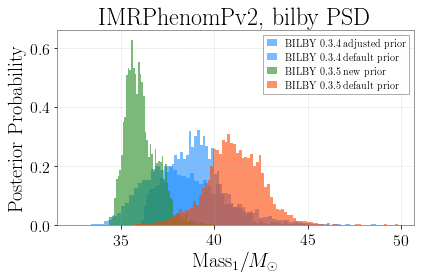

In [99]:
plt.figure()
code = [bilby_Pv2_034_newPrior.posterior['mass_1'], bilby_Pv2_034.posterior['mass_1'] , bilby_Pv2_035_newPrior.posterior['mass_1'], bilby_Pv2_035.posterior['mass_1']]
color = ['dodgerblue', 'dodgerblue', 'forestgreen', 'orangered']
param = r'$\textrm{Mass}_1 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY 0.3.4 adjusted prior', 'BILBY 0.3.4 default prior','BILBY 0.3.5 new prior','BILBY 0.3.5 default prior'] 
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomPv2, bilby PSD')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Version_comparison_mass1.png', format='png', dpi=1000)

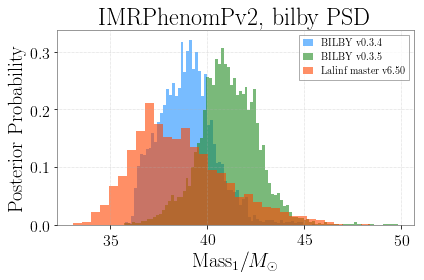

In [60]:
plt.figure()
code = [bilby_Pv2_034.posterior['mass_1'], bilby_Pv2_035.posterior['mass_1'], lal_Pv2['m1']]
color = ['dodgerblue', 'forestgreen', 'orangered']
param = r'$\textrm{Mass}_1 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.4', 'BILBY v0.3.5', 'Lalinf master v6.50']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomPv2, bilby PSD')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Presentatio_PhenomPv2_mass2.png', format='png', dpi=700)

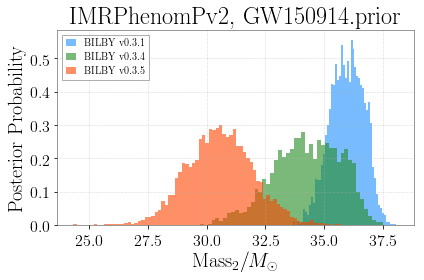

In [136]:
plt.figure()
code = [bilby_Pv2_031[:,9], bilby_Pv2_034.posterior['mass_2'], bilby_Pv2_035.posterior['mass_2']]
# Different range for spin: v0.3.4: 0<a_1,2<0.8; v0.3.1 and 0.3.5: 0<a_1,2<0.9
color = ['dodgerblue', 'forestgreen', 'orangered']
param = r'$\textrm{Mass}_2 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.1', 'BILBY v0.3.4', 'BILBY v0.3.5']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomPv2, GW150914.prior')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
plt.savefig('/home/c1819547/bilby_tutorial/Comparison_145_mass2.png', format='png', dpi=700)

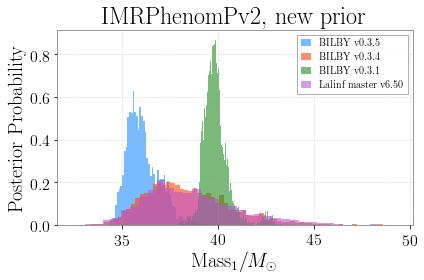

In [85]:
plt.figure()
code = [ bilby_Pv2_035_newPrior.posterior['mass_1'], bilby_Pv2_034_newPrior.posterior['mass_1'], bilby_Pv2_031_newPrior[:,10], lal_Pv2['m1']]
color = ['dodgerblue', 'orangered', 'forestgreen', 'mediumorchid']
param = r'$\textrm{Mass}_1 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.5', 'BILBY v0.3.4', 'BILBY v0.3.1', 'Lalinf master v6.50']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomPv2, new prior')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Presentation_PhenomC_old_mass2.png', format='png', dpi=700)

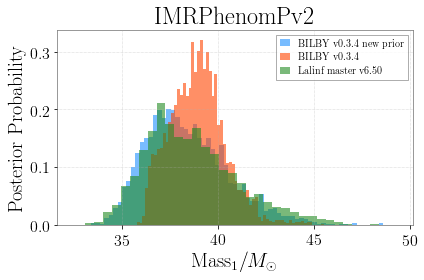

In [86]:
plt.figure()
code = [ bilby_Pv2_034_newPrior.posterior['mass_1'], bilby_Pv2_034.posterior['mass_1'], lal_Pv2['m1']]
color = ['dodgerblue', 'orangered', 'forestgreen', 'mediumorchid']
param = r'$\textrm{Mass}_1 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.4 new prior', 'BILBY v0.3.4', 'Lalinf master v6.50']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomPv2')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Presentation_PhenomC_old_mass2.png', format='png', dpi=700)

**BILBY v0.3.5 runtime**

        Sampling time: 3:04:08.261087
        nsamples: 15631
        Effective runtime: 0.70680 (Sampling time/nsamples)

In [52]:
(3*60*60+4*60+8)/15631

0.7068005885739876

**LALinference v6.50 runtime**

        Sampling time: from 14.57 to 17.08
        n posterior samples: 2334
        Effective runtime: 3.36760

In [65]:
(2*60*60+8*60+3*60)/2334

3.367609254498715

# OTHER PHENOM WAVEFORMS

In [69]:
lalO2_C = np.genfromtxt('/home/c1819547/public_html/LVC/projects/lalinference_O2/lalinferencemcmc/IMRPhenomC/1126259462.39-0/H1L1/posterior_samples.dat', names= True)
lal_C = np.genfromtxt('/home/c1819547/public_html/LVC/projects/lalinference_master/lalinferencemcmc/IMRPhenomC_new/1126259462.39-0/H1L1/posterior_samples.dat', names= True)
bilby_C_old = np.loadtxt('/home/c1819547/bilby_practice/GW150914_IMRPhenomC/outdir/GW150914_posterior_samples.txt', skiprows = 1, delimiter =',')
bilby_C_035_newPrior = bilby.result.read_in_result('/home/c1819547/bilby_practice/GW150914_IMRPhenomC/outdir_v03.5/GW150914_result.h5')
bilby_C_031_newPrior = np.loadtxt('/home/c1819547/bilby_practice/GW150914_IMRPhenomC/outdir_v03.1/GW150914_posterior_samples.txt', skiprows = 1, delimiter =',')

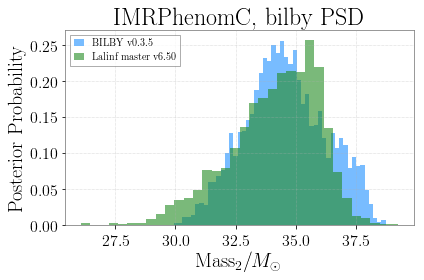

In [70]:
plt.figure()
code = [ bilby_C_035_newPrior.posterior['mass_2'], lal_C['m2']]
color = ['dodgerblue', 'forestgreen']
param = r'$\textrm{Mass}_2 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.5', 'Lalinf master v6.50']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomC, bilby PSD')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Presentation_PhenomC_old_mass2.png', format='png', dpi=700)

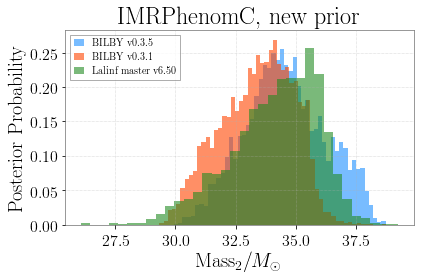

In [80]:
plt.figure()
code = [ bilby_C_035_newPrior.posterior['mass_2'], bilby_C_031_newPrior[:,9], lal_C['m2']]
color = ['dodgerblue', 'orangered', 'forestgreen']
param = r'$\textrm{Mass}_2 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.5', 'BILBY v0.3.1', 'Lalinf master v6.50']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomC, new prior')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Presentation_PhenomC_old_mass2.png', format='png', dpi=700)

In [78]:
lalO2_D = np.genfromtxt('/home/c1819547/public_html/LVC/projects/lalinference_O2/lalinferencemcmc/IMRPhenomD/1126259462.39-0/H1L1/posterior_samples.dat', names= True)
bilby_D_old = np.loadtxt('/home/c1819547/bilby_practice/GW150914_IMRPhenomD/outdir/GW150914_posterior_samples.txt', skiprows = 1, delimiter =',')
bilby_D_031_newPrior = np.loadtxt('/home/c1819547/bilby_practice/GW150914_IMRPhenomD/outdir_v3.1/GW150914_posterior_samples.txt', skiprows = 1, delimiter =',')
bilby_D_031 = np.loadtxt('/home/c1819547/bilby_practice/GW150914_IMRPhenomD/outdir_v3.1_old/GW150914_posterior_samples.txt', skiprows = 1, delimiter =',')
bilby_D_035_newPrior = bilby.result.read_in_result('/home/c1819547/bilby_practice/GW150914_IMRPhenomD/outdir_v03.5/GW150914_result.h5')

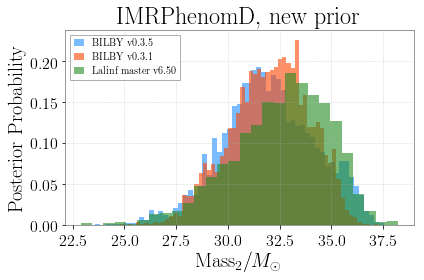

In [79]:
plt.figure()
code = [ bilby_D_035_newPrior.posterior['mass_2'], bilby_D_031_newPrior[:,9], lalO2_D['m2']]
color = ['dodgerblue', 'orangered', 'forestgreen']
param = r'$\textrm{Mass}_2 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.5', 'BILBY v0.3.1', 'Lalinf master v6.50']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomD, new prior')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Presentation_PhenomC_old_mass2.png', format='png', dpi=700)

# PSD Comparison

In [12]:
lal_bilbyPSD = np.genfromtxt('/home/c1819547/public_html/LVC/projects/lalinference_master/lalinferencemcmc/IMRPhenomPv2_onlymass_zeroS/1126259462.39-0/H1L1/posterior_samples.dat', names = True)
lal_lalPSD = np.genfromtxt('/home/c1819547/public_html/LVC/projects/lalinference_master/lalinferencemcmc/IMRPhenomPv2_onlymass_zeroS_newPSD/1126259462.39-0/H1L1/posterior_samples.dat', names = True)

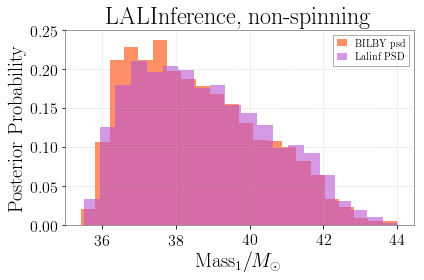

In [119]:
plt.figure()
code = [ lal_bilbyPSD['m1'], lal_lalPSD['m1']]
color = ['orangered', 'mediumorchid']
param = r'$\textrm{Mass}_1 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY psd', 'Lalinf PSD']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('LALInference, non-spinning')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/PSD_comparison_mass2.png', format='png', dpi=1000)

In [135]:
H1 = np.loadtxt('/home/c1819547/lalinference_master/psd_files/H1_PSD_1126258440.42_100.0.txt')
L1 = np.loadtxt('/home/c1819547/lalinference_master/psd_files/L1_PSD_1126258440.42_100.0.txt')

h1_lal = np.loadtxt('/home/c1819547/lalinference_master/GW150914_PSD_onlyM_noS/engine/lalinferencemcmc-0-H1L1-1126259462.39-0.hdf5H1-PSD.dat')
l1_lal = np.loadtxt('/home/c1819547/lalinference_master/GW150914_PSD_onlyM_noS/engine/lalinferencemcmc-0-H1L1-1126259462.39-0.hdf5L1-PSD.dat')

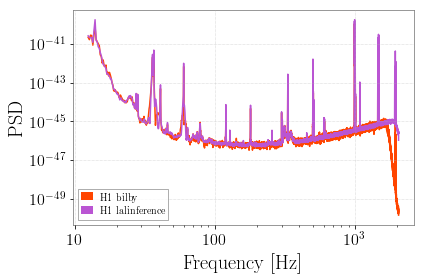

In [134]:
plt.loglog(H1[50:,0], H1[50:,1], label = 'H1 bilby', color = 'orangered')
plt.loglog(h1_lal[50:,0], h1_lal[50:,1], label = 'H1 lalinference', color = 'mediumorchid')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.legend(loc = 'best')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/H1_PSD_comparison.png', format='png', dpi=700)

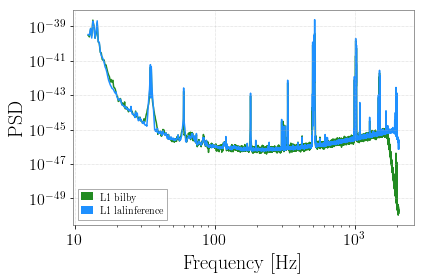

In [131]:
plt.loglog(L1[50:,0], L1[50:,1], label = 'L1 bilby', color = 'forestgreen')
plt.loglog(l1_lal[50:,0], l1_lal[50:,1], label = 'L1 lalinference', color = 'dodgerblue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.legend(loc = 'best')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/L1_PSD_comparison.png', format='png', dpi=700)

# BILBY(0.3.5) vs LALINFERENCE(master and O2)

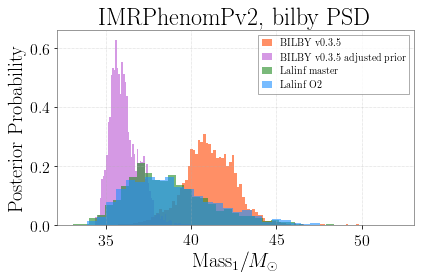

In [98]:
plt.figure()
code = [ bilby_Pv2_035.posterior['mass_1'], bilby_Pv2_035_newPrior.posterior['mass_1'], lal_Pv2['m1'], lalO2_Pv2['m1']]
color = ['orangered','mediumorchid', 'forestgreen','dodgerblue']
param = r'$\textrm{Mass}_1 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.5','BILBY v0.3.5 adjusted prior', 'Lalinf master', 'Lalinf O2']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomPv2, bilby PSD')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()

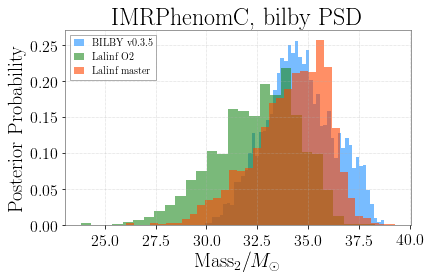

In [137]:
plt.figure()
code = [ bilby_C_035.posterior['mass_2'], lalO2_C['m2'], lal_C['m2']]
color = ['dodgerblue', 'forestgreen', 'orangered']
param = r'$\textrm{Mass}_2 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.5', 'Lalinf O2', 'Lalinf master']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomC, bilby PSD')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()

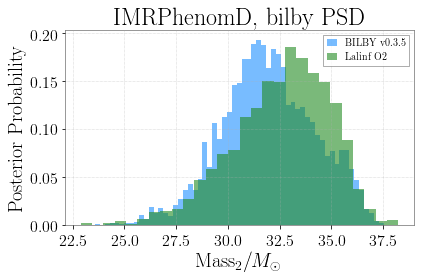

In [138]:
plt.figure()
code = [ bilby_D_035.posterior['mass_2'], lalO2_D['m2']]
color = ['dodgerblue', 'forestgreen']
param = r'$\textrm{Mass}_2 / M_\odot$'
#param = '$a_2$'
legend = ['BILBY v0.3.5', 'Lalinf O2']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6, color = color[i])
    plt.title('IMRPhenomD, bilby PSD')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()

# Comparison of parameters

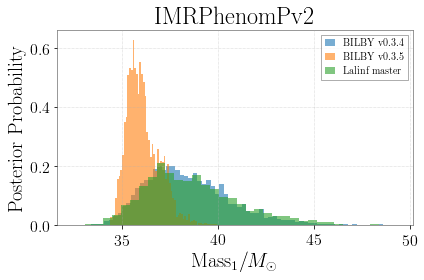

In [143]:
plt.figure()
code = [ bilby_Pv2_034_newPrior.posterior['mass_1'], bilby_Pv2_035_newPrior.posterior['mass_1'], lal_Pv2['m1']]
param = r'$\textrm{Mass}_1 / M_\odot$'
legend = ['BILBY v0.3.4','BILBY v0.3.5', 'Lalinf master']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6)
    plt.title('IMRPhenomPv2')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Version_lalinf_mass1.png', format='png', dpi=700)

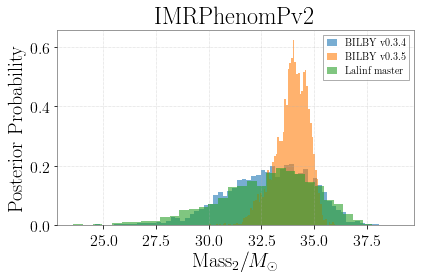

In [106]:
plt.figure()
code = [ bilby_Pv2_034_newPrior.posterior['mass_2'], bilby_Pv2_035_newPrior.posterior['mass_2'], lal_Pv2['m2']]
param = r'$\textrm{Mass}_2 / M_\odot$'
legend = ['BILBY v0.3.4','BILBY v0.3.5', 'Lalinf master']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6)
    plt.title('IMRPhenomPv2')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()

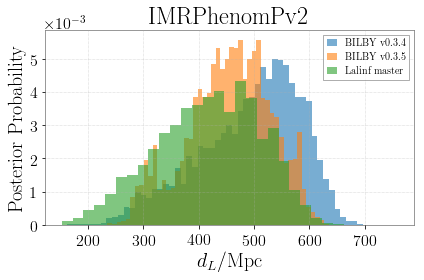

In [121]:
plt.figure()
code = [ bilby_Pv2_034_newPrior.posterior['luminosity_distance'], bilby_Pv2_035_newPrior.posterior['luminosity_distance'], lal_Pv2['dist']]
param = r'$d_L/\textrm{Mpc}$'
legend = ['BILBY v0.3.4','BILBY v0.3.5', 'Lalinf master']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6)
    plt.title('IMRPhenomPv2')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Version_lalinf_dist.png', format='png', dpi=700)

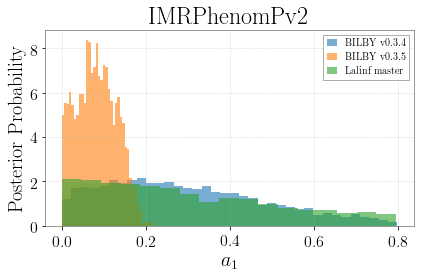

In [112]:
plt.figure()
code = [ bilby_Pv2_034_newPrior.posterior['a_1'], bilby_Pv2_035_newPrior.posterior['a_1'], lal_Pv2['a1']]
param = r'$a_1$'
legend = ['BILBY v0.3.4','BILBY v0.3.5', 'Lalinf master']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6)
    plt.title('IMRPhenomPv2')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()

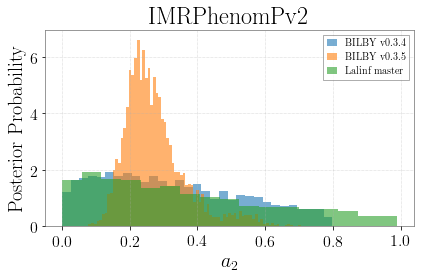

In [113]:
plt.figure()
code = [ bilby_Pv2_034_newPrior.posterior['a_2'], bilby_Pv2_035_newPrior.posterior['a_2'], lal_Pv2['a2']]
param = r'$a_2$'
legend = ['BILBY v0.3.4','BILBY v0.3.5', 'Lalinf master']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6)
    plt.title('IMRPhenomPv2')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()

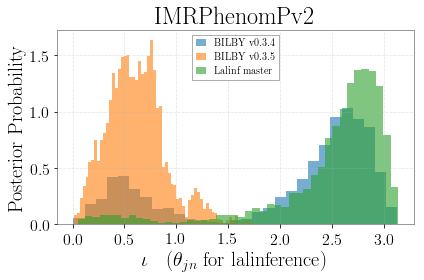

In [128]:
plt.figure()
code = [ bilby_Pv2_034_newPrior.posterior['iota'], bilby_Pv2_035_newPrior.posterior['iota'], lal_Pv2['theta_jn']]
param = r'$\iota \quad (\theta_{jn} \textrm{ for lalinference})$'
legend = ['BILBY v0.3.4','BILBY v0.3.5', 'Lalinf master']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6)
    plt.title('IMRPhenomPv2')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Version_lalinf_iota.png', format='png', dpi=700)

# BILBY v 0.4.0

In [144]:
bilby_Pv2_v04 = bilby.result.read_in_result(filename='/home/c1819547/bilby_practice/BILBY_V04/GW150914_result.h5')

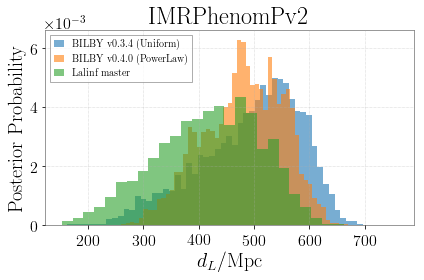

In [147]:
plt.figure()
code = [ bilby_Pv2_034_newPrior.posterior['luminosity_distance'], bilby_Pv2_v04.posterior['luminosity_distance'], lal_Pv2['dist']]
param = r'$d_L/\textrm{Mpc}$'
legend = ['BILBY v0.3.4 (Uniform)','BILBY v0.4.0 (PowerLaw)', 'Lalinf master']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6)
    plt.title('IMRPhenomPv2')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Version_lalinf_dist.png', format='png', dpi=700)

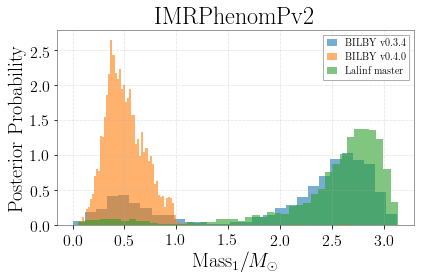

In [151]:
plt.figure()
code = [ bilby_Pv2_034_newPrior.posterior['iota'], bilby_Pv2_v04.posterior['iota'], lal_Pv2['theta_jn']]
param = r'$\textrm{Mass}_1 / M_\odot$'
legend = ['BILBY v0.3.4','BILBY v0.4.0', 'Lalinf master']
for i in range(len(code)):
    plt.hist(code[i], bins ='auto', density = 1, label = legend[i], alpha = 0.6)
    plt.title('IMRPhenomPv2')
    plt.legend(loc='best')
    plt.xlabel(param)
    plt.ylabel('Posterior Probability')
plt.tight_layout()
#plt.savefig('/home/c1819547/bilby_tutorial/Version_lalinf_dist.png', format='png', dpi=700)